### TTest-40k Unprotected

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import scipy
from tqdm import tqdm, trange
#from tqdm import tnrange,tqdm_notebook
import matplotlib.pyplot as plt
from scipy.stats import t
import matplotlib.pyplot as plt
import gmpy2
from gmpy2 import mpz,mpq,mpfr,mpc
import os
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm_notebook

In [2]:
rl_num = 162770 / 2

In [3]:
d_len = 1627700
d_file_len = 1627700
num_files = 16277

In [4]:
def prodTraces(path,dataset):
    myArray = []
    myArray = np.array(myArray)
    index = 0
    index2 = 1
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats = []
        mats = sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False)
        myArray = myArray.tolist()
        
        if dataset == 1:
            start_flag = 0
        if dataset == 2:
            start_flag = 1
            
        for j in range(start_flag,10,2):
            myArray.append(mats['data'][j] * mats['data'][j])
        myArray = np.array(myArray)
        myArray = myArray.sum(axis=0)
        myArray = np.array([myArray])
        index = index + 1       
    return(myArray)

In [5]:
def sumTraces(path,dataset):
    myArray = []
    myArray = np.array(myArray)
    index = 0
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats = []
        mats = sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False)
        myArray = myArray.tolist()
        
        # switch between datset 1 and 2
        if dataset == 1:
            start_flag = 0
        if dataset == 2:
            start_flag = 1
        
        for j in range(start_flag,10,2):
            myArray.append(mats['data'][j])
        myArray = np.array(myArray)
        myArray = myArray.sum(axis=0)
        myArray = np.array([myArray])
        index = index + 1       
    return(myArray)

### Calculate sum and prod

In [6]:
# calulate sum for dataset 1
df_ds1_sum = sumTraces('../real_traces/SBOX_traces2019-12-24_10_54_27/spot_4_12/traces/',1)
df_ds1_sum = np.array(df_ds1_sum)

In [7]:
# calulate sum for dataset 2
df_ds2_sum = sumTraces('../real_traces/SBOX_traces2019-12-24_10_54_27/spot_4_12/traces/',2)
df_ds2_sum = np.array(df_ds2_sum)

In [8]:
# calulate prod for dataset 1
df_ds1_prod = prodTraces('../real_traces/SBOX_traces2019-12-24_10_54_27/spot_4_12/traces/',1)
df_ds1_prod = np.array(df_ds1_prod)

In [9]:
df_ds1_prod

array([[1.86250864e+09, 1.88083297e+09, 1.07615548e+09, ...,
        1.55896192e+09, 1.61112882e+09, 2.35834577e+09]])

In [10]:
len(df_ds1_prod[0])

5000

In [11]:
# calulate sum for dataset 2
df_ds2_prod = prodTraces('../real_traces/SBOX_traces2019-12-24_10_54_27/spot_4_12/traces/',2)
df_ds2_prod = np.array(df_ds2_prod)

### Write Files 

In [116]:
pd.DataFrame(df_ds1_sum).to_csv('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds1_sum.csv',index=False,header=False)

In [117]:
pd.DataFrame(df_ds2_sum).to_csv('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds2_sum.csv',index=False,header=False)

In [118]:
pd.DataFrame(df_ds1_prod).to_csv('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds1_prod.csv',index=False,header=False)

In [119]:
pd.DataFrame(df_ds2_prod[0]).to_csv('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds2_prod.csv',index=False,header=False)

In [6]:
from numpy import genfromtxt
df_ds1_prod = genfromtxt('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds1_sum.csv', delimiter=',')
df_ds2_prod = genfromtxt('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds2_sum.csv', delimiter=',')
df_ds1_sum = genfromtxt('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds1_prod.csv', delimiter=',')
df_ds2_sum = genfromtxt('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_ds2_prod.csv', delimiter=',')

In [41]:
df_ds1_mean = df_ds1_sum / rl_num
df_ds1_mean = df_ds1_mean[0]

In [42]:
df_ds2_mean = df_ds2_sum / rl_num
df_ds2_mean = df_ds2_mean[0]

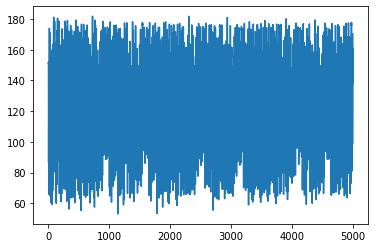

In [43]:
plt.plot(df_ds1_mean)

In [44]:
#plt.plot(df_ds1_mean[30000:500000])

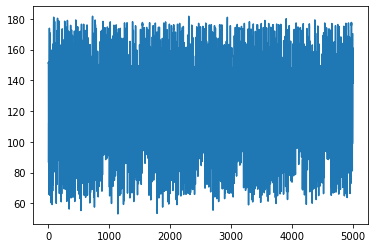

In [45]:
plt.plot(df_ds2_mean)

In [72]:
df_ds1_var = 1/rl_num*(((df_ds1_sum ** 2) / rl_num) + df_ds1_prod)
df_ds1_var = df_ds1_var

In [73]:
df_ds2_var = 1/rl_num*(((df_ds2_sum ** 2) / rl_num) + df_ds2_prod)
df_ds2_var = df_ds2_var

In [74]:
df_ds1_std = np.sqrt(df_ds1_var)
df_ds1_std = df_ds1_std[0]

In [75]:
df_ds2_std = np.sqrt(df_ds2_var)
df_ds2_std = df_ds2_std[0]

In [76]:
import matplotlib.pyplot as plt

In [77]:
df_ds1_std

array([213.82611506, 214.9296776 , 162.53604498, ..., 195.50735154,
       198.85319597, 240.70713853])

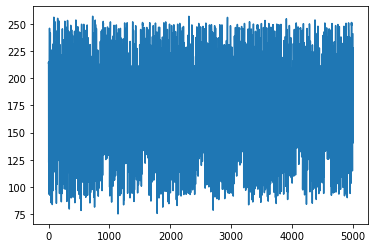

In [78]:
plt.plot(df_ds1_std)

### T-Test 

In [79]:
def tMean(data1,data2):
    return(data1 - data2)

In [80]:
def tSN(std,n):
    return(std**2/n)

In [81]:
def ttestCalc(mean1,mean2,std1,std2,data_len):
    tv = (tMean(mean1,mean2)) / (np.sqrt(tSN(std1,data_len) + tSN(std2,data_len)))
    return(np.abs(tv))

In [82]:
def tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,tLeng):
    arr_collect_All=[]
    #for j in tnrange(0,(int(tLeng/2))):
    for j in tnrange(0,tLeng):    
        arr_collect=[]
        arr_collect_All.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[j],df_ds1_std[j],df_ds2_std[j],rl_num))
            #arr_collect.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[i],df_ds1_std[j],df_ds2_std[i],data1,data2))
        #arr_collect_All.append(np.amax(arr_collect))
    return(arr_collect_All)

In [83]:
myTest = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,len(df_ds2_std))

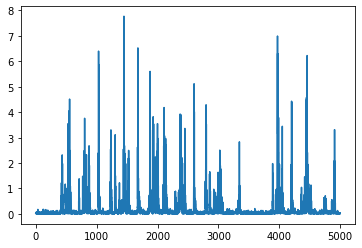

In [84]:
plt.plot(myTest)

In [86]:
myTest = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,len(df_ds2_std))

In [87]:
#myTest = tTest(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000],len(df_ds2_std[30000:500000]))

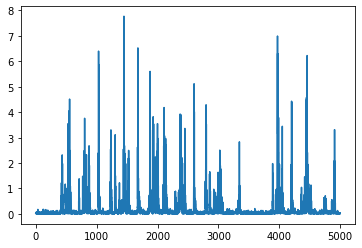

In [102]:
plt.plot(myTest)

### Degree of freedom

In [89]:
def vS2(data_len,df_ds1_std,df_ds2_std):    
    s22 = (tSN(df_ds1_std,data_len) + tSN(df_ds2_std,data_len))**2
    return(s22)

In [90]:
def df(df_ds1_std,df_ds2_std):
    
    data_len = rl_num
    s22 = vS2(data_len,df_ds1_std,df_ds2_std)
    
    term1 = (df_ds1_std**2 / (data_len))**2 / (data_len - 1)
    term2 = (df_ds2_std**2 / (data_len))**2 / (data_len - 1)

    v = s22 / (term1 + term2)
    
    return(v)

### CDF

In [94]:
def cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std):
    cdf_array = []
    
    colLen = 5000

    tV = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,colLen)
    #print(tV)
    v = df(df_ds1_std,df_ds2_std)
    
    
    #print("t-value",tV[24])
    #print("v-value",v[24])
    
    for i in range(0,colLen):
        cdf_array.append(t.cdf(-1 *(tV[i]),v[i]))
        
    return(cdf_array)

### T-Test TS1

In [95]:
#df_CDF = cdf(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000])

In [96]:
df_CDF = cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std)

In [97]:
pd.DataFrame(df_CDF).to_csv('../real_traces/SBOX_traces2019__avg_sb1_fx2/df_CDF2.csv',index=False,header=False)

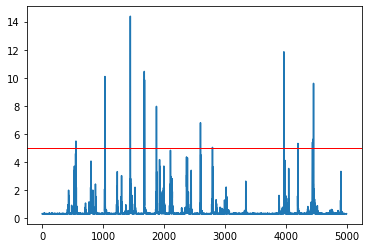

In [99]:
plt.plot(-np.log10(df_CDF),'-')
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### Analyzing

In [100]:
meanData = df_ds1_mean - df_ds2_mean

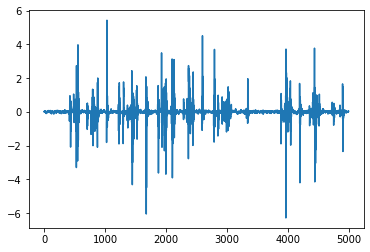

In [101]:
plt.plot(meanData)